# **TASK 1 : SENTIMENT ANALYSIS ON SOCIAL MEDIA DATA**

### **Description:**

Build a sentiment analysis model to classify social media posts as positive, negative, or neutral.

### **Steps:**

1. Data Collection: Gather a dataset of social media posts with labeled sentiments.
2. Text Preprocessing: Clean and preprocess the text data by removing special characters, stopwords, and performing tokenization.
3. Feature Extraction: Convert the text data into numerical features using techniques like TF-IDF or word embeddings.
4. Model Selection: Choose a suitable classification algorithm such as Naive Bayes, Support Vector Machines, or a neural network.
7. Model Training: Train the selected model using the preprocessed data.
8. Model Evaluation: Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.
9. Deployment: Create a simple web interface where users can input their own text for sentiment analysis.

###**Tech Stack:**

• Python
• Natural Language Processing libraries
• Machine Learning frameworks

# **1. Data Collection :**

## **Dataset : amazon_reviews.csv**

This dataset containing Amazon Product Data includes product categories and various metadata. The product with the most comments in the electronics category has user ratings and comments.

In [1]:
import pandas as pd

dataset = pd.read_csv("/content/amazon_review.csv")
dataset

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.0,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.0,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.0,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.0,Great little card,1379289600,2013-09-16,448,0,0


# **2. Text Preprocessing :**

In [2]:
dataset.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
day_diff            int64
helpful_yes         int64
total_vote          int64
dtype: object

In [4]:
dataset.reviewText.head()

0                                           No issues.
1    Purchased this for my device, it worked as adv...
2    it works as expected. I should have sprung for...
3    This think has worked out great.Had a diff. br...
4    Bought it with Retail Packaging, arrived legit...
Name: reviewText, dtype: object

In [5]:
sample_review = dataset.reviewText[4212]
sample_review

'NOTE:  please read the last update (scroll to the bottom) - I\'m leaving this review as 1 star as it appears to help others who purchased and had a similar experience.I give SanDisk 5 stars for customer service and 1 star for the product (for those manufactured in the past)  For those newly manufactured products that contain the software ROM fix, I\'d give the product 5 stars.To all those who purchased this card due to all the great reviews.... and then used it in a Galaxy S4 (GS4) smartphone for storage, the solution to the problem is not one you can solve without returning the card to SanDisk for a replacement under warranty.  Believe me I tried everything that the Google searches returned as solutions... formatting as exFAT, formatting in the GS4 then copying data to the card while in the phone etc.... nothing worked... and so now please stop pulling out your hair and hopefully you will get the same result which I hope to get soon (just RMA\'d and will send it back tomorrow for a f

In [6]:
# we clean it from punctuation and numbers - using regex. {Regular expression}

import re

sample_review = re.sub("[^a-zA-Z]",' ',sample_review)
sample_review

'NOTE   please read the last update  scroll to the bottom    I m leaving this review as   star as it appears to help others who purchased and had a similar experience I give SanDisk   stars for customer service and   star for the product  for those manufactured in the past   For those newly manufactured products that contain the software ROM fix  I d give the product   stars To all those who purchased this card due to all the great reviews     and then used it in a Galaxy S   GS   smartphone for storage  the solution to the problem is not one you can solve without returning the card to SanDisk for a replacement under warranty   Believe me I tried everything that the Google searches returned as solutions    formatting as exFAT  formatting in the GS  then copying data to the card while in the phone etc     nothing worked    and so now please stop pulling out your hair and hopefully you will get the same result which I hope to get soon  just RMA d and will send it back tomorrow for a free

In [7]:
sample_review = sample_review.lower().split()
sample_review

['note',
 'please',
 'read',
 'the',
 'last',
 'update',
 'scroll',
 'to',
 'the',
 'bottom',
 'i',
 'm',
 'leaving',
 'this',
 'review',
 'as',
 'star',
 'as',
 'it',
 'appears',
 'to',
 'help',
 'others',
 'who',
 'purchased',
 'and',
 'had',
 'a',
 'similar',
 'experience',
 'i',
 'give',
 'sandisk',
 'stars',
 'for',
 'customer',
 'service',
 'and',
 'star',
 'for',
 'the',
 'product',
 'for',
 'those',
 'manufactured',
 'in',
 'the',
 'past',
 'for',
 'those',
 'newly',
 'manufactured',
 'products',
 'that',
 'contain',
 'the',
 'software',
 'rom',
 'fix',
 'i',
 'd',
 'give',
 'the',
 'product',
 'stars',
 'to',
 'all',
 'those',
 'who',
 'purchased',
 'this',
 'card',
 'due',
 'to',
 'all',
 'the',
 'great',
 'reviews',
 'and',
 'then',
 'used',
 'it',
 'in',
 'a',
 'galaxy',
 's',
 'gs',
 'smartphone',
 'for',
 'storage',
 'the',
 'solution',
 'to',
 'the',
 'problem',
 'is',
 'not',
 'one',
 'you',
 'can',
 'solve',
 'without',
 'returning',
 'the',
 'card',
 'to',
 'sandisk',

In [8]:
rt = lambda x: re.sub("[^a-zA-Z]",' ',str(x))
dataset["reviewText"] = dataset["reviewText"].map(rt)
dataset["reviewText"] = dataset["reviewText"].str.lower()
dataset.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased this for my device it worked as adv...,5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected i should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out great had a diff br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought it with retail packaging arrived legit...,5.0,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",it s mini storage it doesn t do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",i have it in my phone and it never skips a bea...,5.0,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",it s hard to believe how affordable digital ha...,5.0,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",works in a htc rezound was running short of ...,5.0,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",in my galaxy s super fast card and am total...,5.0,works great,1381449600,2013-11-10,393,0,0


In [9]:
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

'''
# Sentiment analysis
# TextBlob Exit will return polarity and subjectivity.
# Polarity indicates your mood, that is, whether it is positive.
# It returns a value between 0 and 1. The closer to 1 the more positive, the closer to 0 the more negative.
'''

dataset[['polarity', 'subjectivity']] = dataset['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in dataset['reviewText'].iteritems():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        dataset.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        dataset.loc[index, 'sentiment'] = "Positive"
    else:
        dataset.loc[index, 'sentiment'] = "Neutral"

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-9-0674e5228cac>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in dataset['reviewText'].iteritems():


In [11]:
# Let's see if we have an unbalanced data problem

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot','Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(),
                          x = [str(i) for i in df[column_name].value_counts().index],
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=15),
                          name = column_name,
                          textposition = 'auto',
                          showlegend=False,
                          marker=dict(color = ['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D'],
                                      line=dict(color='#DBE6EC',
                                                width=1))),
                  row = 1, col = 1)

    fig.add_trace(go.Pie(labels= df[column_name].value_counts().keys(),
                         values= df[column_name].value_counts().values,
                         textfont = dict(size = 20),
                         textposition='auto',
                         showlegend = False,
                         name = column_name,
                         marker=dict(colors=['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D'])),
                  row = 1, col = 2)

    fig.update_layout(title={'text': column_name,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [12]:
categorical_variable_summary(dataset,'overall')

In [13]:
categorical_variable_summary(dataset,'sentiment')

# **3. Feature Extraction :**

In [14]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

In [15]:
dataset['overall'] = dataset["overall"].apply(sentiment)

<Axes: >

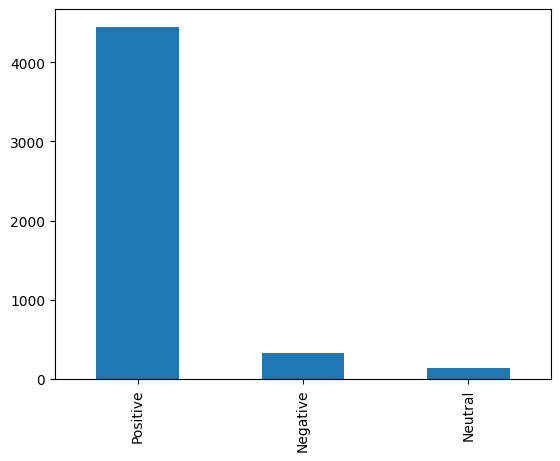

In [16]:
dataset.overall.value_counts().plot(kind = "bar")

In [17]:
pos_comments = dataset[dataset.overall == 'Positive']
pos_comments.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity,subjectivity,sentiment
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues,Positive,Four Stars,1406073600,2014-07-23,138,0,0,0.000000,0.0000,Negative
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased this for my device it worked as adv...,Positive,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.200000,0.2000,Negative
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected i should have sprung for...,Positive,nothing to really say....,1356220800,2012-12-23,715,0,0,0.129167,0.5250,Negative
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out great had a diff br...,Positive,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.212500,0.4875,Positive
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought it with retail packaging arrived legit...,Positive,best deal around,1373673600,2013-07-13,513,0,0,0.386667,0.3600,Positive


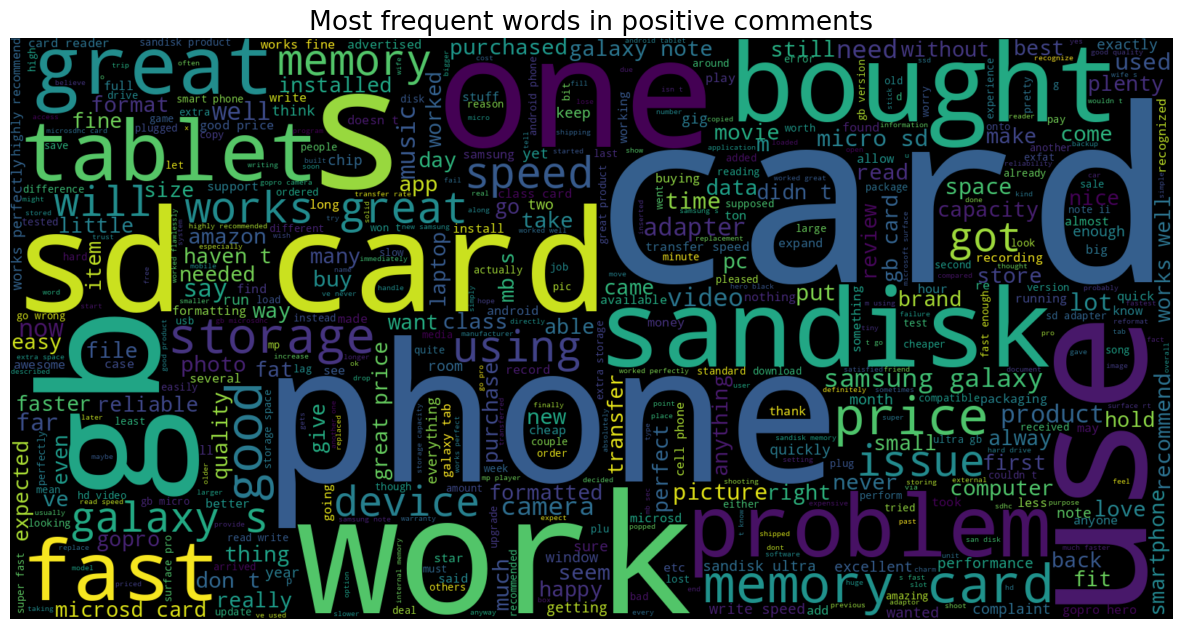

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [19]:
neu_comments = dataset[dataset.overall == 'Neutral']
neu_comments.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity,subjectivity,sentiment
11,A2Q3ICGWZLY3JJ,B007WTAJTO,98020,"[0, 0]",it works but file writes are a bit slower tha...,Neutral,"It works, but not as fast as expected",1384905600,2013-11-20,383,0,0,-0.033333,0.175000,Neutral
64,APAEBFIM1588A,B007WTAJTO,"Adam Wright ""Electrical Engineer""","[1, 1]",this card advertises itself as uhs but it s a...,Neutral,only capable of doing DDR50/SDR50 max,1378684800,2013-09-09,455,1,1,-0.275000,0.591667,Positive
112,A1NA2JGI3GNDN2,B007WTAJTO,Albert,"[0, 0]",does it s job and fairly cheap for what it s w...,Neutral,Ok product,1399161600,2014-04-05,247,0,0,0.289583,0.333333,Positive
122,A3PCW69GQK8R38,B007WTAJTO,Alejandro Hernndez,"[0, 0]",still don t feel is very fast or is just my ph...,Neutral,Great capasity,1391385600,2014-03-02,281,0,0,0.380000,0.640000,Positive
163,A277QWS5WF6DWI,B007WTAJTO,Alton L Spencer,"[0, 0]",worked great in my galaxy s until it didn t ...,Neutral,Worked great--until it didn't....,1401148800,2014-05-27,195,0,0,0.233333,0.450000,Positive


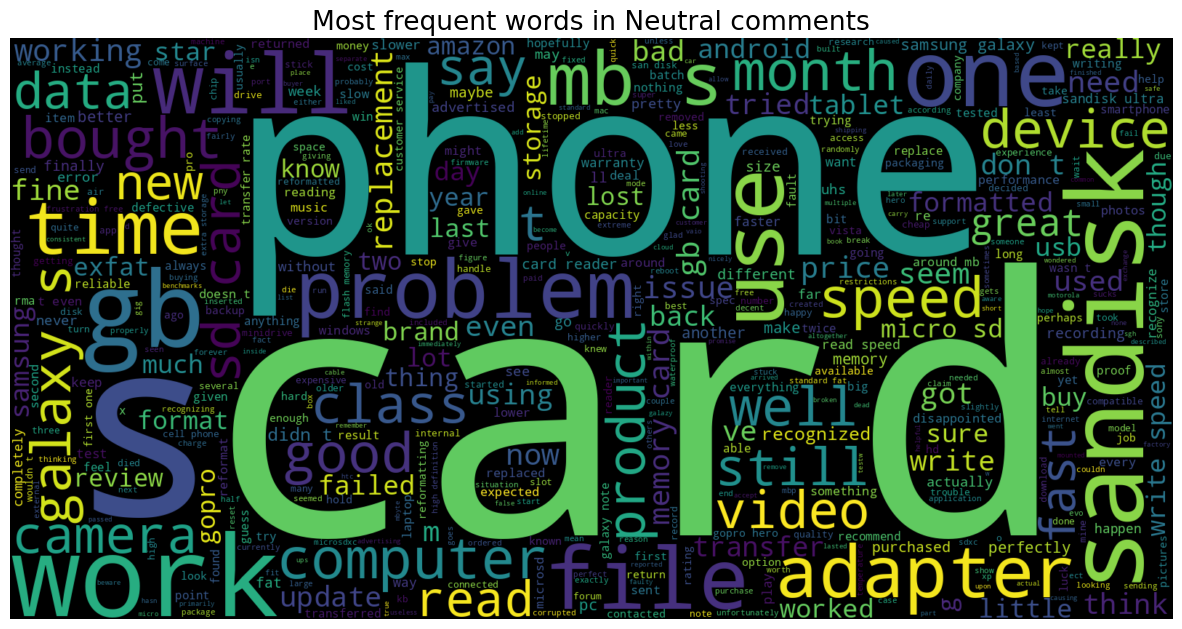

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Neutral comments', fontsize=19)
plt.show()

In [21]:
neg_comments = dataset[dataset.overall == 'Negative']
neg_comments.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity,subjectivity,sentiment
32,AF24M1HKIZ7QC,B007WTAJTO,"Abdulrahman J. Alrashed ""dr34m3r""","[0, 0]",i bought of those sandisk gb microsd us...,Negative,Bought 2 :) Died,1375488000,2013-03-08,640,0,0,0.125000,0.416667,Negative
38,A1FKE13D77L3Y3,B007WTAJTO,Abraham Arturo Meza Marin,"[0, 0]",i bougth this micro sd card after some trubles...,Negative,Stop working after 1 year,1361232000,2013-02-19,657,0,0,0.273965,0.578586,Positive
43,A1X1FX3NSOFCT3,B007WTAJTO,"Abused Commuter ""abused_commuter""","[0, 1]",ordered this for a galaxy s lasted a few mo...,Negative,Beware... goes bad and takes your pics with it,1374278400,2013-07-20,506,0,1,0.082341,0.382540,Negative
49,A2RJ7DAL63MN1F,B007WTAJTO,Ace of Sevens,"[0, 0]",i used this for a few months in my phone then...,Negative,Worked for a few months,1391126400,2014-01-31,311,0,0,0.090606,0.310909,Negative
108,A28CTDM7OP0RAR,B007WTAJTO,Alan,"[0, 0]",it works but the actual r w speeds are mb...,Negative,Painfully slow,1395705600,2014-03-25,258,0,0,-0.020833,0.406944,Positive


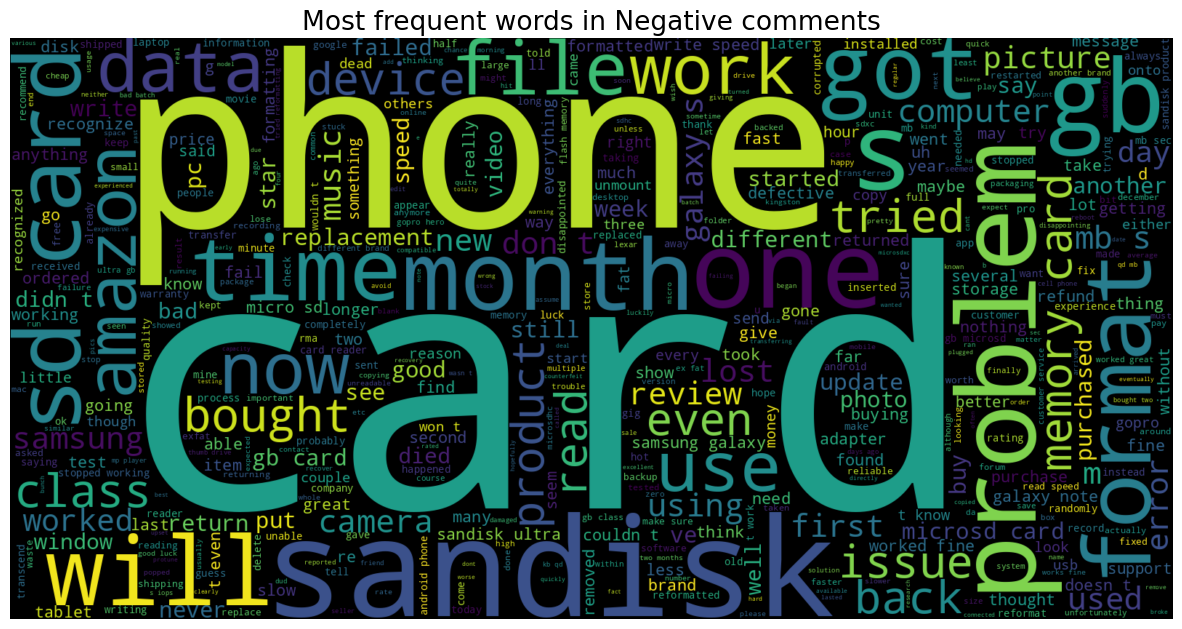

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative comments', fontsize=19)
plt.show()

In [23]:
# Create Lables

from sklearn.preprocessing import LabelEncoder

def create_label(dataset, dependent_var, independent_var):
  sia = SentimentIntensityAnalyzer()
  dataset[independent_var] = dataset[dependent_var].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
  dataset[independent_var] = LabelEncoder().fit_transform(dataset[independent_var])

  X = dataset[dependent_var]
  y = dataset[independent_var]

  return X, y

In [24]:
X, y = create_label(dataset, "reviewText", "sentiment_label")

# **4. Model Selection**

*   Logistic Regression
*   Random Forest

# **5. Model Training**

In [25]:
# Split Dataset

from sklearn.model_selection import train_test_split, cross_val_score

def split_dataset(dataframe, X, y):
  train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=1)
  return train_x, test_x, train_y, test_y

In [26]:
train_x, test_x, train_y, test_y = split_dataset(dataset, X, y)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def create_features_count(train_x, test_x):
  # Count Vectors
  vectorizer = CountVectorizer()
  x_train_count_vectorizer = vectorizer.fit_transform(train_x)
  x_test_count_vectorizer = vectorizer.fit_transform(test_x)

  return x_train_count_vectorizer, x_test_count_vectorizer

In [28]:
x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)

In [29]:
def create_features_TFIDF_word(train_x, test_x):
  # TF-IDF word
  tf_idf_word_vectorizer = TfidfVectorizer()
  x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(train_x)
  x_test_tf_idf_word = tf_idf_word_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_word, x_test_tf_idf_word

In [30]:
x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)

# **6. Model Evaluation**

### **Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

def crate_model_logistic(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  loj_count = LogisticRegression(solver='lbfgs', max_iter=1000)
  loj_model_count = loj_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(loj_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  loj_word = LogisticRegression(solver='lbfgs', max_iter=1000)
  loj_model_word = loj_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(loj_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  return loj_model_count, loj_model_word

In [32]:
loj_model_count, loj_model_word = crate_model_logistic(train_x, test_x)

Accuracy - Count Vectors: 0.819
Accuracy - TF-IDF Word: 0.777


### **Random Forest**

In [33]:
from sklearn.ensemble import RandomForestClassifier

def crate_model_randomforest(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  rf_count = RandomForestClassifier()
  rf_model_count = rf_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(rf_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  rf_word = RandomForestClassifier()
  rf_model_word = rf_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(rf_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  return rf_model_count, rf_model_word

In [34]:
rf_model_count, rf_model_word = crate_model_randomforest(train_x, test_x)

Accuracy - Count Vectors: 0.778
Accuracy - TF-IDF Word: 0.771


# **7. Deployment :**

In [35]:
def predict_count(train_x, model, new_comment):
  new_comment= pd.Series(new_comment)
  new_comment = CountVectorizer().fit(train_x).transform(new_comment)
  result = model.predict(new_comment)
  if result==1:
    print("Comment is Positive")
  else:
    print("Comment is Negative")

In [36]:
# Logistic Regression

predict_count(train_x, model=loj_model_count, new_comment="this product is very good :)")

Comment is Positive


In [37]:
# Random Forest

predict_count(train_x, model=rf_model_count, new_comment="this product is very bad :)")

Comment is Positive


In [38]:
# Sample Review

new_comment=pd.Series(dataset["reviewText"].sample(1).values)
new_comment

0    my slr has sd cards that take time for the nex...
dtype: object

In [39]:
# Sample Review - Random Forest

predict_count(train_x, model=rf_model_count, new_comment=new_comment)

Comment is Positive
